# Bibliotecas

In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
from pylab import text

In [2]:
data_folder = r"C:\Users\anaso\Desktop\workspace\doutorado\data"
saving_path = r"C:\Users\anaso\Desktop\workspace\doutorado\imagens"

# Gráficos

### Resultados online do modelo NB136

In [3]:
data_teste = pd.read_csv(data_folder + "\\test_data.csv", sep=';')
data_teste.rename(columns={'Time':'time'}, inplace=True)
data_teste['time'] = pd.to_datetime(data_teste['time'])
data_teste.head()

,time,PDIT-301,PIT-302,PIT-303,PIT-304,PIT-305,PIT-306,VT-301,VT-302,VT-303,...,TI-306,TI-307,TI-308,TI-309,TI-310,Corrente,Potencia,FIT-323,rotulos_multi,rotulos_bin
0,2015-05-05 20:34:00,17.0,783.650024,149.949997,149.600006,281.399994,15015.000000,1363.699951,1286.099976,2114.000000,...,2615.100098,4246.100098,4052.399902,2616.000000,2774.000000,113.900002,2.784667,3934.600098,0.0,0
1,2015-05-05 20:35:00,17.0,783.700012,150.449997,148.750000,267.950012,17595.650391,1640.000000,1474.900024,2377.949951,...,2621.100098,4858.700195,4648.000000,2874.399902,3229.000000,139.100006,2.980000,4338.799805,0.0,0
2,2015-05-05 20:40:00,17.0,270.700012,155.050003,154.399994,235.949997,16107.349609,1639.949951,1433.400024,2499.300049,...,2734.000000,4381.549805,4116.700195,3417.000000,3218.149902,96.900002,1.520000,2128.000000,0.0,0
3,2015-05-05 20:41:00,17.0,778.650024,143.649994,143.300003,237.300003,17771.949219,1704.050049,1538.400024,2431.149902,...,2749.750000,5028.700195,4802.000000,3503.699951,3458.850098,136.100006,2.971000,4344.799805,0.0,0
4,2015-05-05 20:42:00,17.0,778.000000,143.000000,142.000000,194.100006,17540.550781,1655.949951,1503.949951,2395.850098,...,2766.449951,5285.600098,5077.000000,3688.149902,3845.699951,140.000000,2.960000,4307.200195,0.0,0


In [4]:
data_teste.columns

Index(['time', 'PDIT-301', 'PIT-302', 'PIT-303', 'PIT-304', 'PIT-305',
       'PIT-306', 'VT-301', 'VT-302', 'VT-303', 'VT-304', 'VT-321', 'VT-322',
       'VT-323', 'VT-324', 'ZT-301', 'ZT-302', 'TI-305', 'TI-306', 'TI-307',
       'TI-308', 'TI-309', 'TI-310', 'Corrente', 'Potencia', 'FIT-323',
       'rotulos_multi', 'rotulos_bin'],
      dtype='object')

In [5]:
# Normaliza os dados para manter a confidencialidade

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

cols = ['PDIT-301', 'PIT-302', 'PIT-303', 'PIT-304', 'PIT-305', 'PIT-306', 'VT-301', 'VT-302', 'VT-303', \
        'VT-304', 'VT-321', 'VT-322', 'VT-323', 'VT-324', 'ZT-301', 'ZT-302', 'TI-305', 'TI-306', 'TI-307', \
       'TI-308', 'TI-309', 'TI-310', 'Corrente', 'Potencia', 'FIT-323', 'time', 'rotulos_multi', 'rotulos_bin']

ct = ColumnTransformer([('somename', StandardScaler(), data_teste.columns[1:-2])], remainder='passthrough')
data_teste = pd.DataFrame(ct.fit_transform(data_teste), columns=cols)
data_teste.head()

,PDIT-301,PIT-302,PIT-303,PIT-304,PIT-305,PIT-306,VT-301,VT-302,VT-303,VT-304,...,TI-307,TI-308,TI-309,TI-310,Corrente,Potencia,FIT-323,time,rotulos_multi,rotulos_bin
0,-0.922816,0.273346,1.066153,2.994399,0.269731,-0.196815,-0.251852,-0.253715,-0.476315,-0.199653,...,-2.113096,-1.974695,-3.760592,-3.483735,-3.586969,-1.897204,-0.755666,2015-05-05 20:34:00,0.0,0
1,-0.922816,0.273543,1.083577,2.895721,0.009069,0.409029,0.345224,0.177113,-0.147316,0.075728,...,-1.432622,-1.351987,-3.450252,-2.871115,-1.576053,-1.262349,-0.495263,2015-05-05 20:35:00,0.0,0
2,-0.922816,-1.749864,1.243875,3.551633,-0.611094,0.05963,0.345116,0.082413,0.003941,0.141754,...,-1.962639,-1.907468,-2.798584,-2.885724,-4.943539,-6.00751,-1.919558,2015-05-05 20:40:00,0.0,0
3,-0.922816,0.253624,0.846614,2.263027,-0.584931,0.450417,0.483635,0.322015,-0.081005,0.172455,...,-1.243787,-1.190978,-2.694457,-2.561642,-1.815447,-1.2916,-0.491397,2015-05-05 20:41:00,0.0,0
4,-0.922816,0.25106,0.823963,2.112109,-1.422151,0.396093,0.379692,0.243402,-0.125004,0.046017,...,-0.958423,-0.903462,-2.472931,-2.040781,-1.504235,-1.327351,-0.515621,2015-05-05 20:42:00,0.0,0


In [6]:
results_online_nb136_17_18 = pd.read_csv(data_folder + "\\results_online_nb136_17_18.csv", sep=';')
results_online_nb136_17_18 = results_online_nb136_17_18.dropna().drop(['Unnamed: 0'], axis=1)
results_online_nb136_17_18['time'] = pd.to_datetime(results_online_nb136_17_18['time'])

results_online_nb136_20_24 = pd.read_csv(data_folder + "\\results_online_nb136_20_24.csv", sep=';')
results_online_nb136_20_24 = results_online_nb136_20_24.dropna().drop(['Unnamed: 0'], axis=1)
results_online_nb136_20_24['time'] = pd.to_datetime(results_online_nb136_20_24['time'])

C:\Users\anaso\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
results_online_nb136_17_18.head()

,time,real,prediction
24,2015-05-05 21:02:00,0.0,1.0
25,2015-05-05 21:03:00,0.0,1.0
26,2015-05-05 21:04:00,0.0,1.0
27,2015-05-05 21:05:00,0.0,1.0
28,2015-05-05 21:06:00,0.0,1.0


In [8]:
results_online_nb136_20_24.head()

,time,real,prediction
24,2015-09-24 04:49:00,0.0,0.0
25,2015-09-24 04:50:00,0.0,0.0
26,2015-09-24 04:51:00,0.0,0.0
27,2015-09-24 04:52:00,0.0,0.0
28,2015-09-24 04:53:00,0.0,0.0


### Falha 17

In [9]:
fault = 17

In [10]:
print(results_online_nb136_17_18[results_online_nb136_17_18['real'] == fault].time.max())
print(data_teste[data_teste['rotulos_multi'] == fault].time.max())
max_date = data_teste[data_teste['rotulos_multi'] == fault].time.max()

2015-05-23 14:58:00
2015-05-23 14:58:00


In [11]:
fault_predict = results_online_nb136_17_18[results_online_nb136_17_18['time'] <= max_date]
fault_vars = data_teste[data_teste['time'] <= max_date][24:]

print(fault_predict.shape)
print(fault_vars.shape)

(24984, 3)
(24984, 28)


In [12]:
final_dataset = fault_predict.merge(fault_vars, how='left', on=['time'])
final_dataset.shape

(24984, 30)

In [13]:
final_dataset.isnull().sum().sum()

0

In [14]:
final_dataset_filter = final_dataset[19000:].copy()
final_dataset_filter['prediction'].iloc[:2070] = 0.0

C:\Users\anaso\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
final_dataset_filter['prediction'] = final_dataset_filter['prediction'].astype('int')

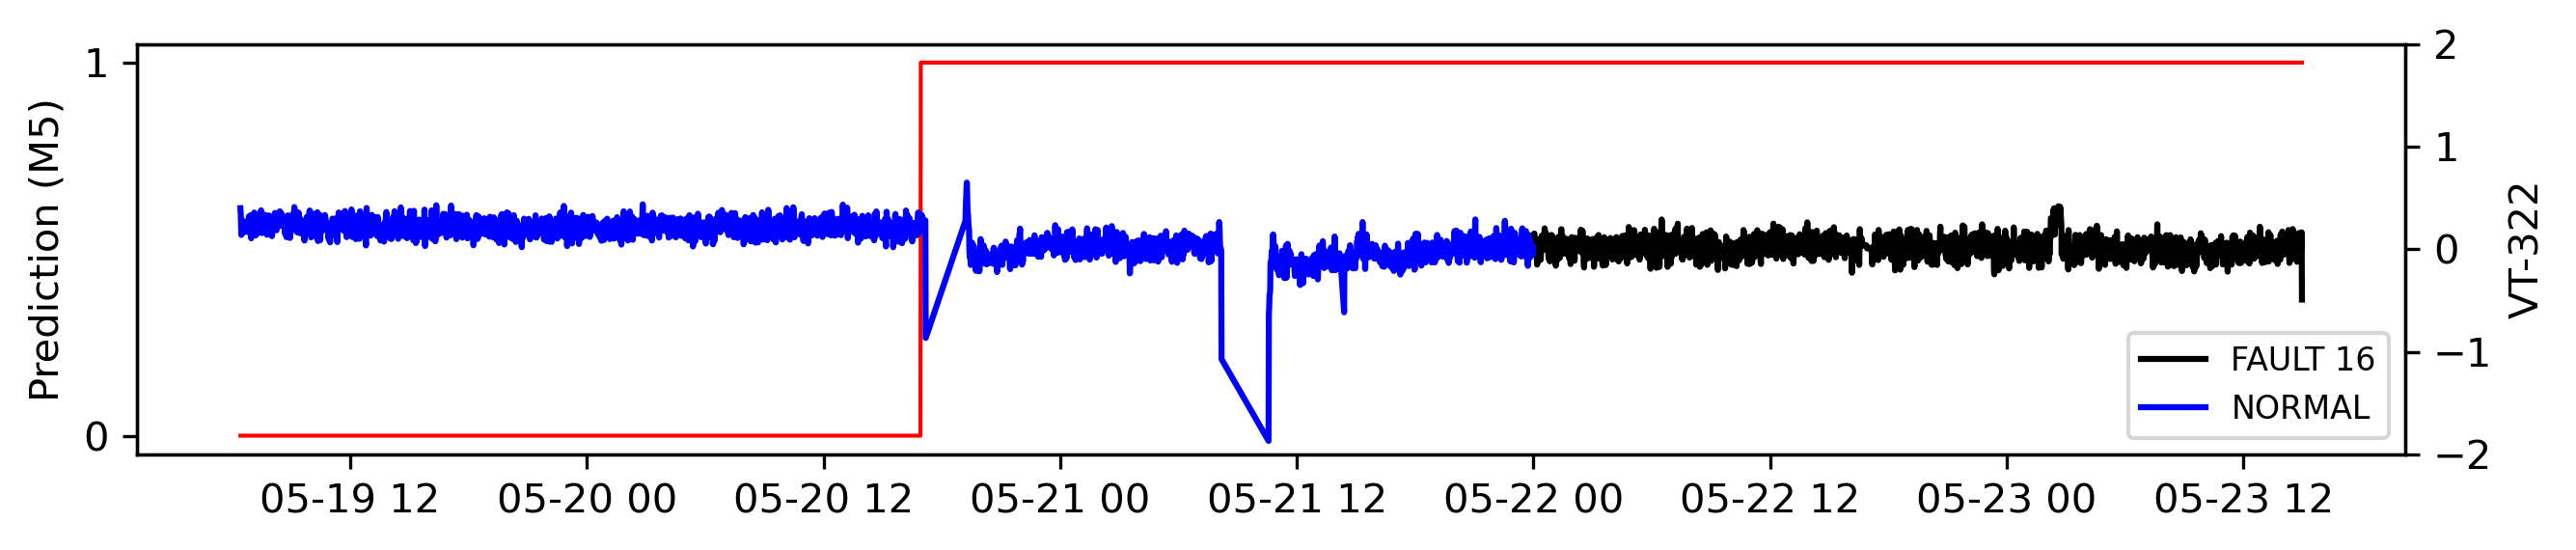

In [16]:
fig, ax1 = plt.subplots(figsize=(9,2), dpi=300)

ax2 = ax1.twinx()
plot1 = ax1.plot(final_dataset_filter['time'], final_dataset_filter['prediction'], color='red', label='PREDIÇÃO (M15)', linewidth=1)
plot2 = ax2.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==fault, \
                                                 final_dataset_filter['VT-322'], None), color="black", label='FAULT 16')
plot3 = ax2.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==0, \
                                                 final_dataset_filter['VT-322'], None), color="blue", label='NORMAL')

# ax1.set_xlabel('Timestamp')
ax2.set_ylabel('VT-322')
ax1.set_ylabel('Prediction (M5)')
ax2.set_ylim([-2, 2])
ax1.yaxis.set_ticks(np.arange(0, 2, 1))

# Esquema para unificar na mesma caixa as legendas de ambos os eixos
lns = plot1+plot2+plot3
labs = [l.get_label() for l in lns]
ax2.legend(loc='lower right', prop={'size': 8})
# ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

fig.tight_layout()
# fig.savefig(saving_path + '/ingles_nb136_online_falha17.png', format='png', bbox_inches='tight');

### Falha 18

In [17]:
fault = 18

In [18]:
print(results_online_nb136_17_18[results_online_nb136_17_18['real'] == fault].time.max())
print(data_teste[data_teste['rotulos_multi'] == fault].time.max())
max_date = data_teste[data_teste['rotulos_multi'] == fault].time.max()

2015-06-10 08:44:00
2015-06-10 08:44:00


In [19]:
fault_predict = results_online_nb136_17_18[results_online_nb136_17_18['time'] <= max_date]
fault_vars = data_teste[data_teste['time'] <= max_date][24:]

print(fault_predict.shape)
print(fault_vars.shape)

(47472, 3)
(47472, 28)


In [20]:
final_dataset = fault_predict.merge(fault_vars, how='left', on=['time'])
final_dataset.shape

(47472, 30)

In [21]:
final_dataset.isnull().sum().sum()

0

In [22]:
final_dataset_filter = final_dataset[30000:-1000].copy()

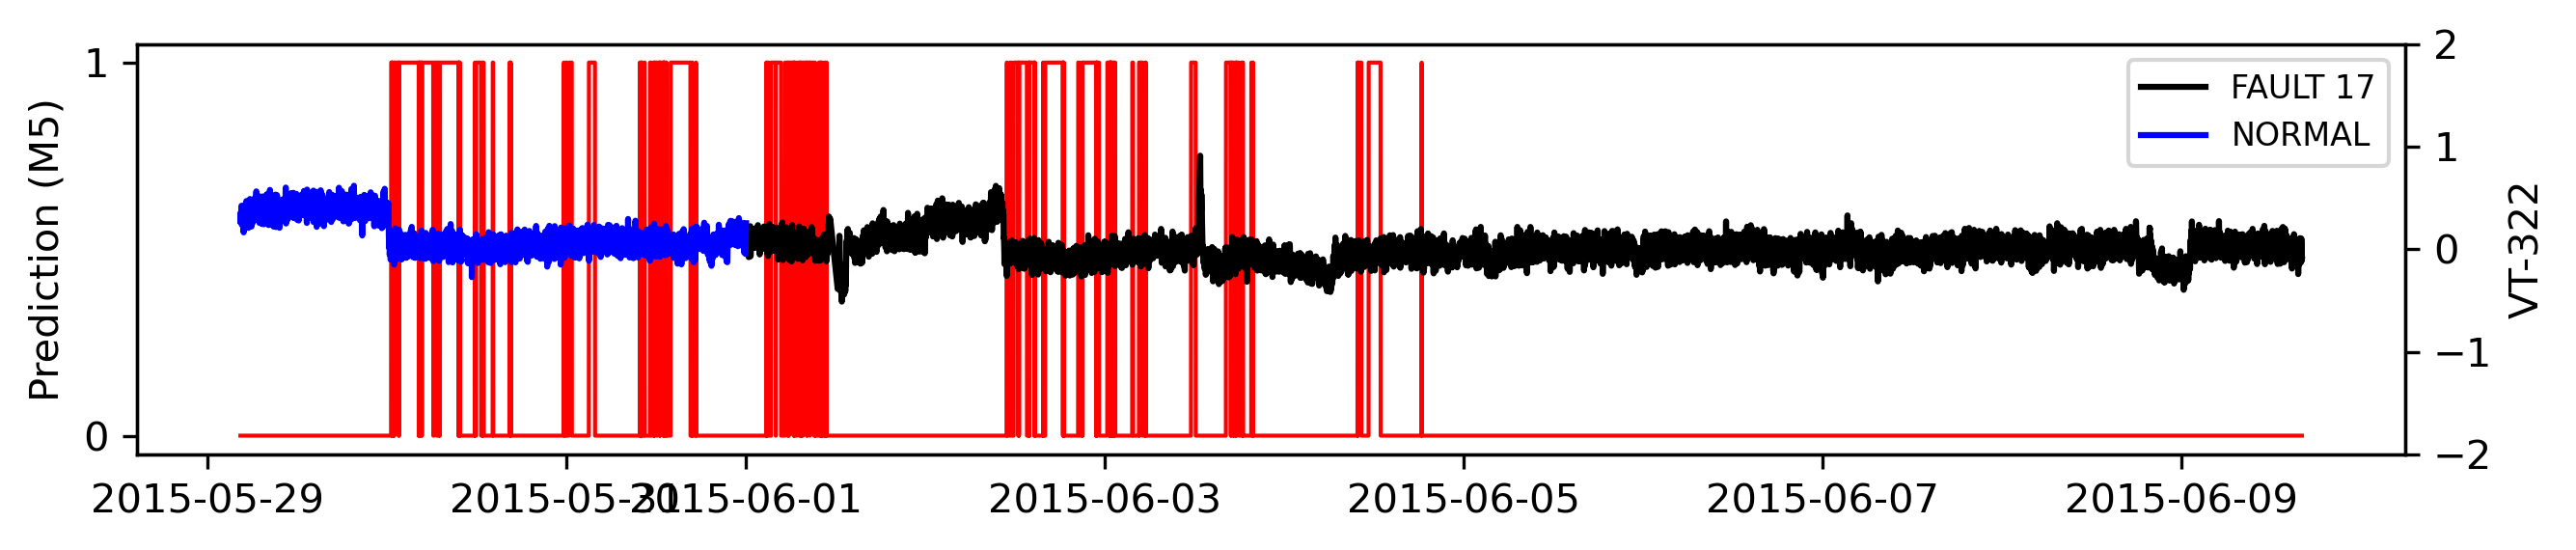

In [23]:
fig, ax1 = plt.subplots(figsize=(9,2), dpi=300)

ax2 = ax1.twinx()
plot1 = ax1.plot(final_dataset_filter['time'], final_dataset_filter['prediction'].astype('int'), color='red', label='PREDIÇÃO (M15)', linewidth=1)
plot2 = ax2.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==fault, \
                                                 final_dataset_filter['VT-322'], None), color="black", label='FAULT 17')
plot3 = ax2.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==0, \
                                                 final_dataset_filter['VT-322'], None), color="blue", label='NORMAL')

# ax1.set_xlabel('Timestamp')
ax2.set_ylabel('VT-322')
ax1.set_ylabel('Prediction (M5)') #color='red'
ax2.set_ylim([-2, 2])
ax1.yaxis.set_ticks(np.arange(0, 2, 1))

# Esquema para unificar na mesma caixa as legendas de ambos os eixos
lns = plot1+plot2+plot3
labs = [l.get_label() for l in lns]
ax2.legend(loc='upper right', prop={'size': 8})
# ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

fig.tight_layout()
# fig.savefig(saving_path + '/ingles_nb136_online_falha18.png', format='png', bbox_inches='tight');

### Falha 20

In [24]:
fault = 20

In [25]:
print(results_online_nb136_20_24[results_online_nb136_20_24['real'] == fault].time.max())
print(data_teste[data_teste['rotulos_multi'] == fault].time.max())
max_date = data_teste[data_teste['rotulos_multi'] == fault].time.max()

2016-10-11 23:59:00
2016-10-11 23:59:00


In [26]:
fault_predict = results_online_nb136_20_24[results_online_nb136_20_24['time'] <= max_date]
fault_vars = data_teste[data_teste['time'] <= max_date][24:]

print(fault_predict.shape)
print(fault_vars.shape)

(21569, 3)
(121569, 28)


In [27]:
final_dataset = fault_predict.merge(fault_vars, how='left', on=['time'])
final_dataset.shape

(21569, 30)

In [28]:
final_dataset.isnull().sum().sum()

0

In [29]:
final_dataset_filter = final_dataset#[30000:].copy()

In [30]:
final_dataset_filter.rotulos_multi.unique()

array([0.0, 19.0, 20.0], dtype=object)

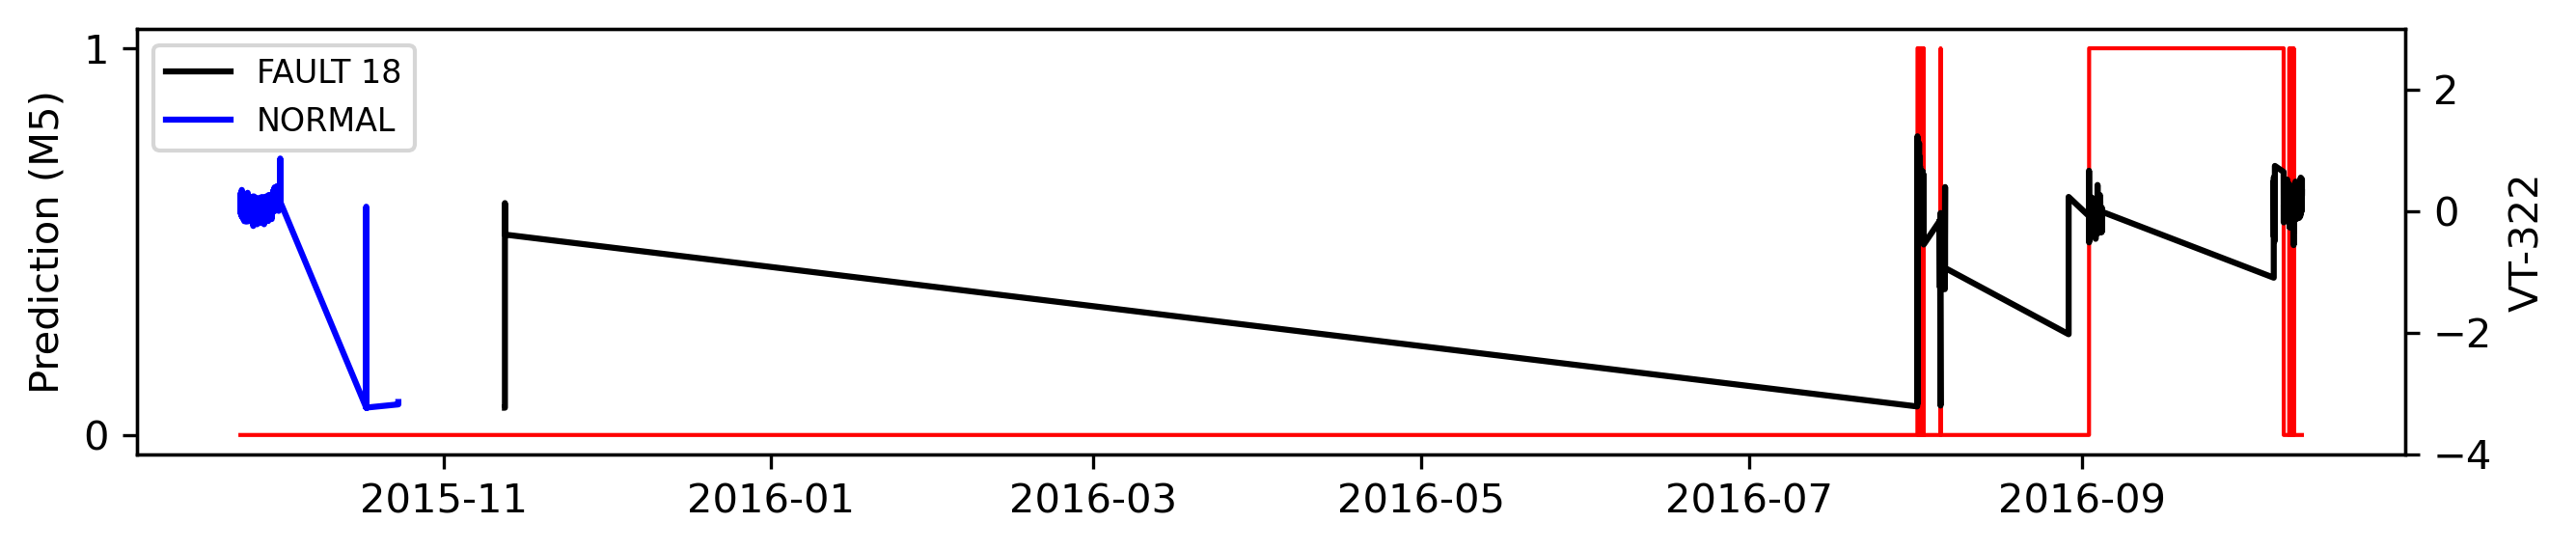

In [31]:
fig, ax1 = plt.subplots(figsize=(9,2), dpi=300)

ax2 = ax1.twinx()
plot1 = ax1.plot(final_dataset_filter['time'], final_dataset_filter['prediction'].astype('int'), color='red', label='PREDIÇÃO (M15)', linewidth=1)
plot2 = ax2.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==fault, \
                                                 final_dataset_filter['VT-322'], None), color="black", label='FAULT 18')
plot3 = ax2.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==0, \
                                                 final_dataset_filter['VT-322'], None), color="blue", label='NORMAL')

# ax1.set_xlabel('Timestamp')
ax2.set_ylabel('VT-322')
ax1.set_ylabel('Prediction (M5)') #color='red'
ax2.set_ylim([-4, 3])
ax1.yaxis.set_ticks(np.arange(0, 2, 1))

# Esquema para unificar na mesma caixa as legendas de ambos os eixos
lns = plot1+plot2+plot3
labs = [l.get_label() for l in lns]
ax2.legend(loc='upper left', prop={'size': 8})
# ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)

fig.tight_layout()
# fig.savefig(saving_path + '/ingles_nb136_online_falha20.png', format='png', bbox_inches='tight');

### Falha 24

In [32]:
fault = 24

In [33]:
print(results_online_nb136_20_24[results_online_nb136_20_24['real'] == fault].time.max())
print(data_teste[data_teste['rotulos_multi'] == fault].time.max())
max_date = data_teste[data_teste['rotulos_multi'] == fault].time.max()

2018-11-11 01:33:00
2018-11-11 01:33:00


In [34]:
fault_predict = results_online_nb136_20_24[results_online_nb136_20_24['time'] <= max_date]
fault_vars = data_teste[data_teste['time'] <= max_date][24:]

print(fault_predict.shape)
print(fault_vars.shape)

(141362, 3)
(241362, 28)


In [35]:
final_dataset = fault_predict.merge(fault_vars, how='left', on=['time'])
final_dataset.shape

(141362, 30)

In [36]:
final_dataset.isnull().sum().sum()

0

In [37]:
final_dataset_filter = final_dataset[45900:105500].copy()
# final_dataset_filter['prediction'].iloc[:2070] = 0.0

In [38]:
final_dataset_filter.rotulos_multi.unique()

array([0.0, 24.0], dtype=object)

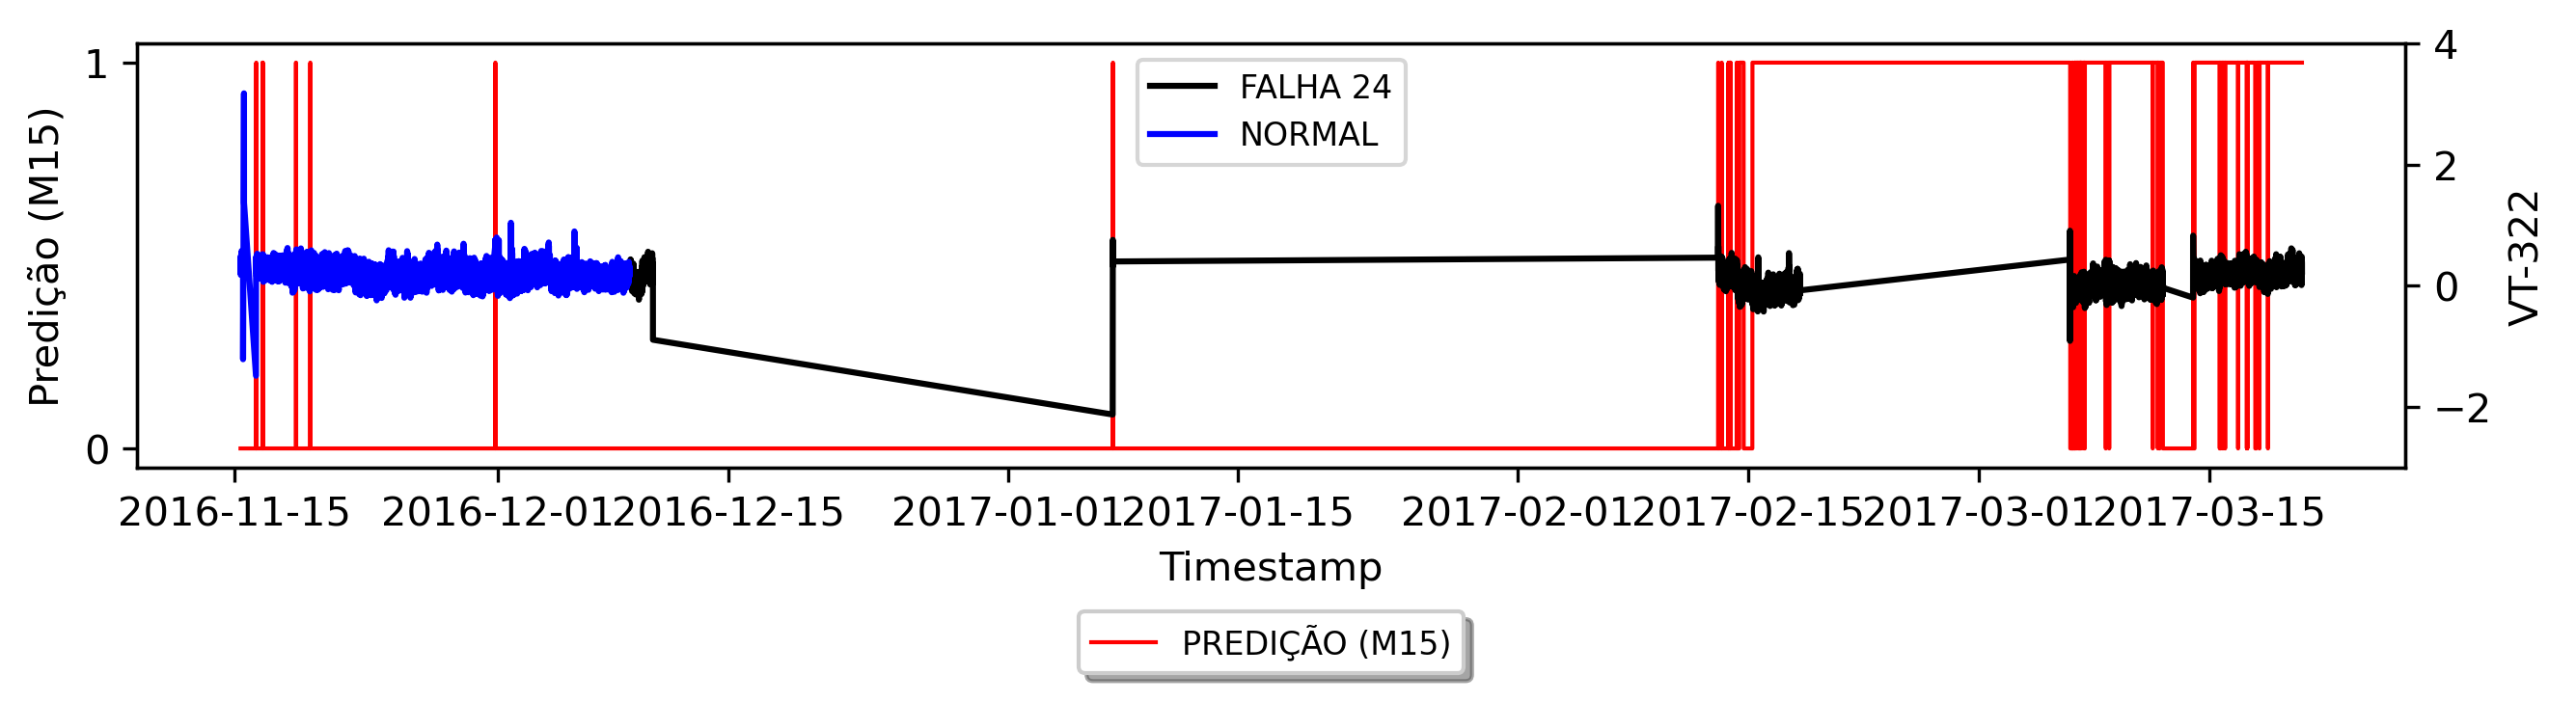

In [39]:
fig, ax1 = plt.subplots(figsize=(9,2.7), dpi=300)

ax2 = ax1.twinx()
plot1 = ax1.plot(final_dataset_filter['time'], final_dataset_filter['prediction'].astype('int'), color='red', label='PREDIÇÃO (M15)', linewidth=1)
plot2 = ax2.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==fault, \
                                                 final_dataset_filter['VT-322'], None), color="black", label='FALHA 24')
plot3 = ax2.plot(final_dataset_filter['time'], np.where(final_dataset_filter["rotulos_multi"]==0, \
                                                 final_dataset_filter['VT-322'], None), color="blue", label='NORMAL')

ax1.set_xlabel('Timestamp')
ax2.set_ylabel('VT-322')
ax1.set_ylabel('Predição (M15)') #color='red'
ax2.set_ylim([-3, 4])
ax1.yaxis.set_ticks(np.arange(0, 2, 1))

# Esquema para unificar na mesma caixa as legendas de ambos os eixos
lns = plot1#+plot2+plot3
labs = [l.get_label() for l in lns]
ax2.legend(loc='upper center', prop={'size': 8})
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=5, prop={'size': 8})

fig.tight_layout()
# fig.savefig(saving_path + '/nb136_online_falha24.png', format='png', bbox_inches='tight');

### Curvas de aprendizagem

In [40]:
history_m15 = pd.read_csv(r"C:\Users\anaso\Desktop\workspace\doutorado\data\simple_model_NB136_6-CNN-history.csv", sep=';')
history_m15

,Unnamed: 0,LOSS - TREINO,LOSS - VALID,ACC - TREINO,ACC - VALID
0,1,1.999563,2.799563,0.095163,0.010484
1,2,1.899541,2.199541,0.171269,0.028731
2,3,1.599451,1.999451,0.219182,0.029182
3,4,1.499399,1.899399,0.349680,0.099680
4,5,1.199326,1.599326,0.393469,0.087469
...,...,...,...,...,...
72,73,0.181269,0.371269,0.909324,0.779324
73,74,0.139292,0.369292,0.899389,0.829389
74,75,0.130642,0.370642,0.939447,0.809447
75,76,0.121905,0.361905,0.949500,0.759500


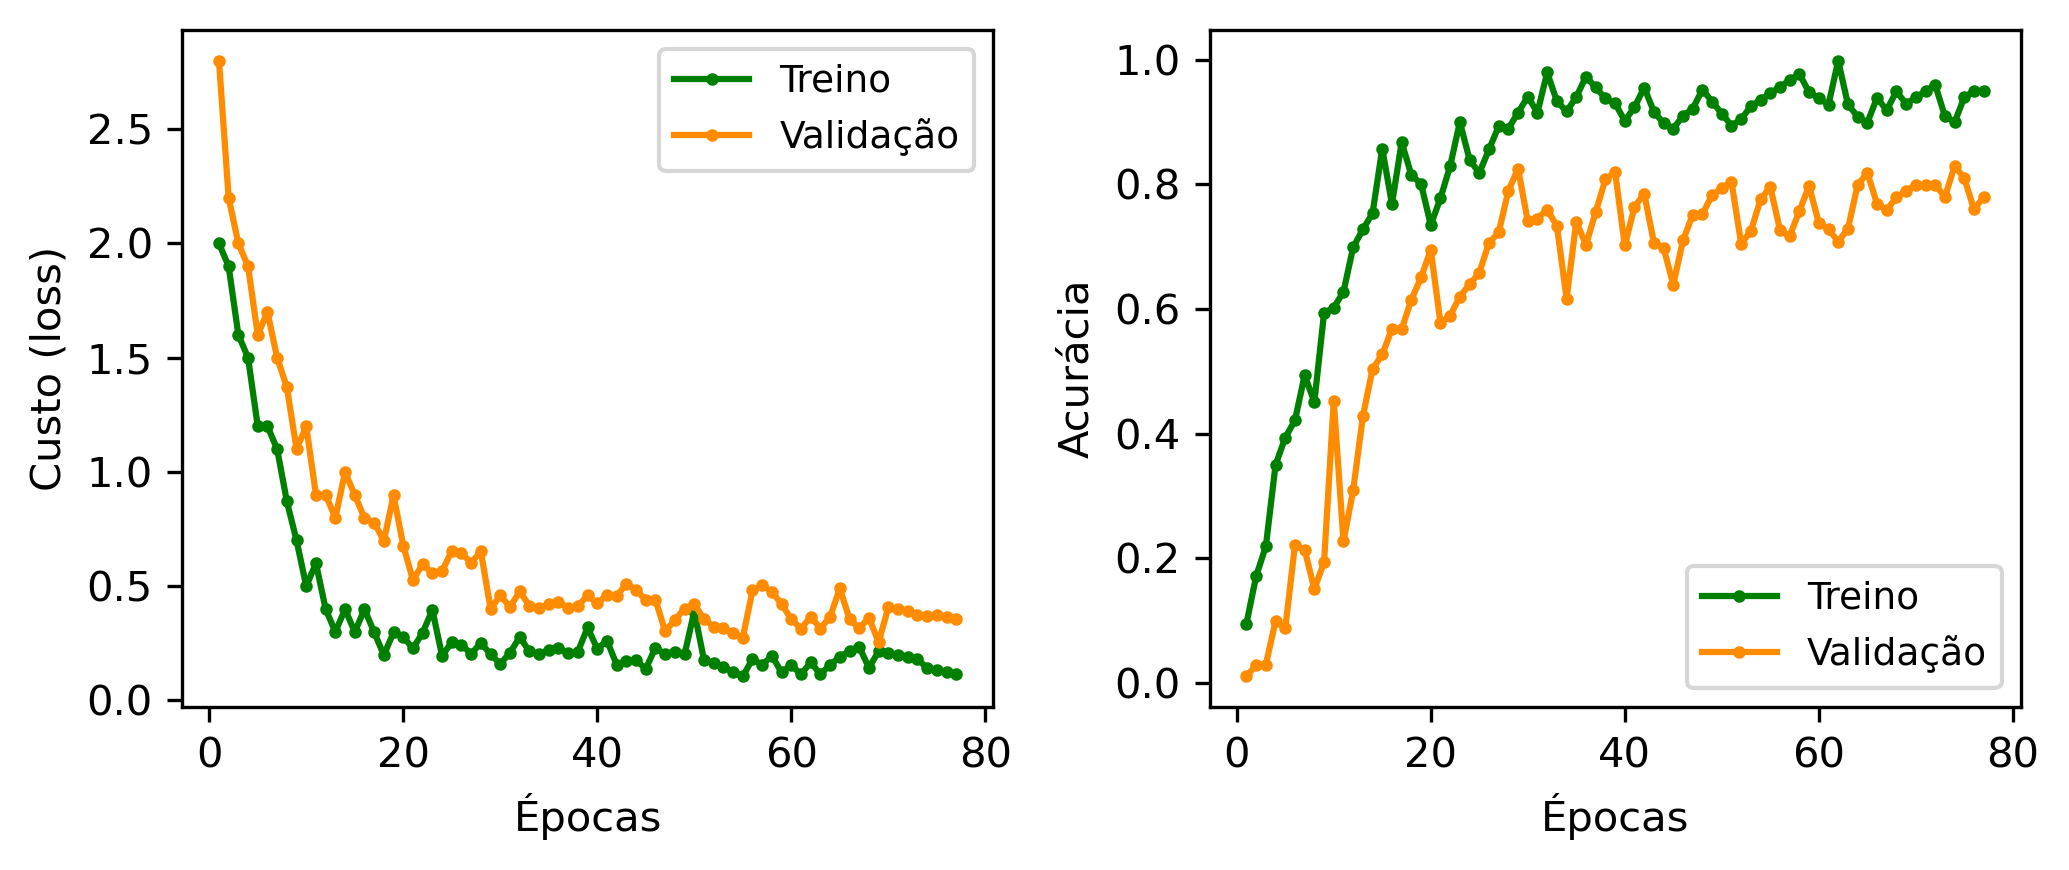

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3), dpi=300)

history_m15_to_plot = history_m15.copy()

ax[0].plot(history_m15_to_plot['Unnamed: 0'], history_m15_to_plot['LOSS - TREINO'], '-go', label='Treino', markersize=2)
ax[0].plot(history_m15_to_plot['Unnamed: 0'], history_m15_to_plot['LOSS - VALID'], '-o', color='darkorange', label='Validação', markersize=2)
ax[0].legend(loc='upper right', prop={'size': 9})
ax[0].set(ylabel='Custo (loss)')
ax[0].set(xlabel='Épocas')

ax[1].plot(history_m15_to_plot['Unnamed: 0'], history_m15_to_plot['ACC - TREINO'], '-go', label='Treino', markersize=2)
ax[1].plot(history_m15_to_plot['Unnamed: 0'], history_m15_to_plot['ACC - VALID'], '-o', color='darkorange', label='Validação', markersize=2)
ax[1].legend(loc='lower right', prop={'size': 9})
ax[1].set(ylabel='Acurácia')
ax[1].set(xlabel='Épocas')

fig.tight_layout()
fig.savefig(saving_path + '/figura50_m15.png', format='png', bbox_inches='tight');